<a href="https://colab.research.google.com/github/JeonJeongumggumg/PyTorch/blob/main/MyLRModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Prediction

In [22]:
import numpy as np

loaded_data = np.loadtxt('/content/drive/MyDrive/DeepLearningbook/diabetes.csv', delimiter=',')

x_train_np = loaded_data[:,0:-1]
y_train_np = loaded_data[:,[-1]]

print('loaded_data.shape= ', loaded_data.shape)
print('x_train_np.shape= ', x_train_np.shape)
print('y_train_np.shape= ', y_train_np.shape)


loaded_data.shape=  (759, 9)
x_train_np.shape=  (759, 8)
y_train_np.shape=  (759, 1)


In [23]:
import torch
from torch import nn

x_train = torch.Tensor(x_train_np)
y_train = torch.Tensor(y_train_np)

class MyLRModel(nn.Module):

    def __init__(self):
      super().__init__()
      self.logistic_stack = nn.Sequential(
          nn.Linear(8, 1),
          nn.Sigmoid()
      )

    def forward(self, data):
        prediction = self.logistic_stack(data)

        return prediction


In [24]:
model = MyLRModel()

for param in model.parameters():
  print(param)


Parameter containing:
tensor([[ 0.1667,  0.1273, -0.2941,  0.3046, -0.0734,  0.0985, -0.1992,  0.0950]],
       requires_grad=True)
Parameter containing:
tensor([-0.1604], requires_grad=True)


In [25]:
loss_function = nn.BCELoss()#로지스틱 회귀 문제임으로 손실함수는 binary Cross Entropy nn.BERLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)#SGD:확률적경사하강법


In [26]:
train_loss_list=[]
train_accuracy_list=[]

nums_epoch = 5000

for epoch in range(nums_epoch+1):
    outputs = model(x_train)
    loss = loss_function(outputs, y_train) #로지스틱 회귀모델의 예측값과 정답과의 오차를 계산
    train_loss_list.append(loss.item())

    predicted = outputs>0.5
    correct = (predicted.float() == y_train) #정확도를 구하는 부분, sigmoid특성상 모델 예측값 0.5이상 True이므로 True일때는 1.0으로 타입캐스팅해서 정답 y_train과 비교
    accuracy = correct.sum().item() / len(correct)

    train_accuracy_list.append(accuracy)


    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('epoch = ',epoch, 'current loss = ', loss.item(), 'accuracy = ', accuracy)

epoch =  0 current loss =  0.7562533020973206 accuracy =  0.3451910408432148
epoch =  100 current loss =  0.5811524987220764 accuracy =  0.6627140974967062
epoch =  200 current loss =  0.5452390313148499 accuracy =  0.7206851119894598
epoch =  300 current loss =  0.5239739418029785 accuracy =  0.7628458498023716
epoch =  400 current loss =  0.5104180574417114 accuracy =  0.7602108036890646
epoch =  500 current loss =  0.5012705326080322 accuracy =  0.764163372859025
epoch =  600 current loss =  0.49482810497283936 accuracy =  0.7628458498023716
epoch =  700 current loss =  0.4901406764984131 accuracy =  0.7654808959156785
epoch =  800 current loss =  0.48664185404777527 accuracy =  0.764163372859025
epoch =  900 current loss =  0.48397549986839294 accuracy =  0.7628458498023716
epoch =  1000 current loss =  0.48190799355506897 accuracy =  0.764163372859025
epoch =  1100 current loss =  0.4802808165550232 accuracy =  0.766798418972332
epoch =  1200 current loss =  0.4789831042289734 acc

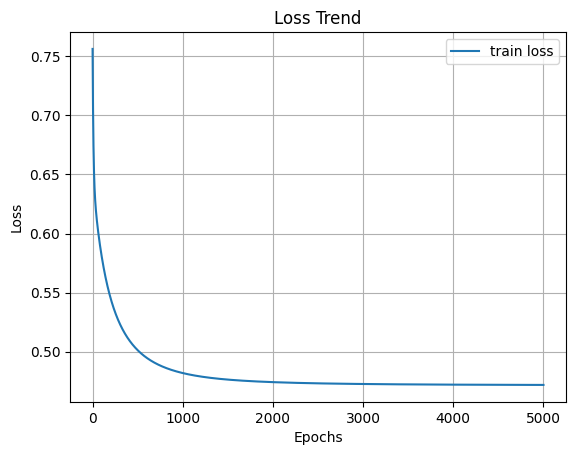

In [27]:
import matplotlib.pyplot as plt
plt.title('Loss Trend')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()

plt.plot(train_loss_list, label = 'train loss')
plt.legend(loc = 'best')
plt.show()

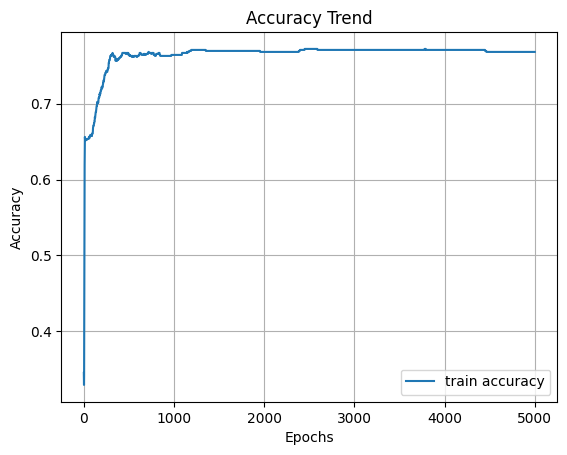

In [28]:
import matplotlib.pyplot as plt
plt.title('Accuracy Trend')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()

plt.plot(train_accuracy_list, label = 'train accuracy')
plt.legend(loc = 'best')
plt.show()

고려해야할 사항

1)현재는 오직 train data에 대한 손실과 정확도

학습중에 머신러닝과 딥러닝 시스템이 train data에만 최적화 되는 오버피팅을 확인할 수 있는 validation data와 학습을 마친 후에 train data가 아닌 임의의 데이터로 시스템 성능을 검증할 수 있는 test data가 반드시 필요

2)배치 사이즈 설정

지금은 전체 데이터를 모두 시스템에 입력하고 계산했지만, 이러면 속도, 정확도같은 시스템 성능이 떨어지기에 한번에 들어가는 데이터 크기인 배치 사이즈 설정이 반드시 필요.